### Preprocessing

In [1]:
#1.1 Loading the data set and performing inspection
import pandas as pd

data = pd.read_csv('../data/bongo_scam.csv')
print(data.head()) 
print("Columns:", data.columns.tolist())
print(data['Category'].value_counts())
print("\nMissing Values:")
print(data.isnull().sum())

  Category                                                Sms
0    trust              Nipigie baada ya saa moja, tafadhali.
1     scam  Naomba unitumie iyo Hela kwenye namba hii ya A...
2     scam  666,KARIBU FREEMASON UTIMIZE NDOTO KATIKA BIAS...
3    trust         Watoto wanapenda sana zawadi ulizowaletea.
4     scam  IYO PESA ITUME KWENYE NAMBA HII 0657538690 JIN...
Columns: ['Category', 'Sms']
Category
scam     1000
trust     508
Name: count, dtype: int64

Missing Values:
Category    0
Sms         0
dtype: int64


In [10]:
#1.2 conduct text preprocessing

import re
from nltk.tokenize import word_tokenize
import nltk


nltk.download('punkt')

swahili_stopwords = {
    'na', 'ya', 'kwa', 'ni', 'za', 'katika', 'au', 'hiyo', 'hii', 'yake', 
    'yangu', 'yetu', 'wao', 'wetu', 'mimi', 'wewe', 'nini', 'je', 'sana'
}

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text) 
    tokens = word_tokenize(text)  
    tokens = [token for token in tokens if token not in swahili_stopwords]
    return ' '.join(tokens)


data['cleaned_sms'] = data['Sms'].apply(preprocess_text)
print("Sample preprocessed data:")
print(data[['Sms', 'cleaned_sms']].head())

[nltk_data] Downloading package punkt to /home/sj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sample preprocessed data:
                                                 Sms  \
0              Nipigie baada ya saa moja, tafadhali.   
1  Naomba unitumie iyo Hela kwenye namba hii ya A...   
2  666,KARIBU FREEMASON UTIMIZE NDOTO KATIKA BIAS...   
3         Watoto wanapenda sana zawadi ulizowaletea.   
4  IYO PESA ITUME KWENYE NAMBA HII 0657538690 JIN...   

                                         cleaned_sms  
0                   nipigie baada saa moja tafadhali  
1  naomba unitumie iyo hela kwenye namba airtel j...  
2  karibu freemason utimize ndoto biashara kilimo...  
3               watoto wanapenda zawadi ulizowaletea  
4  iyo pesa itume kwenye namba jina italeta magom...  


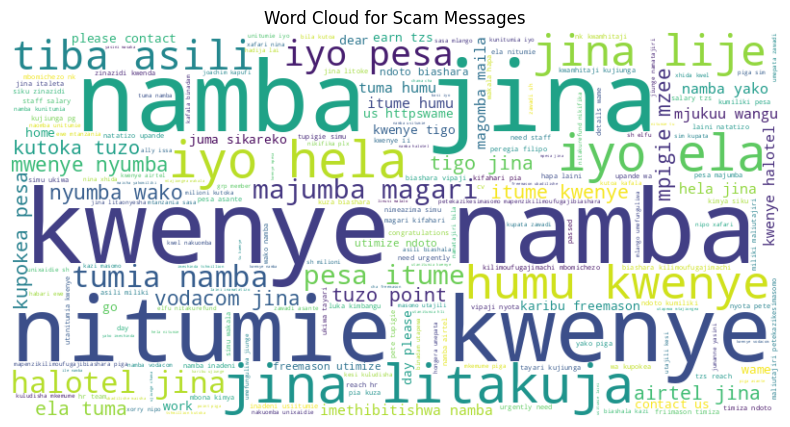

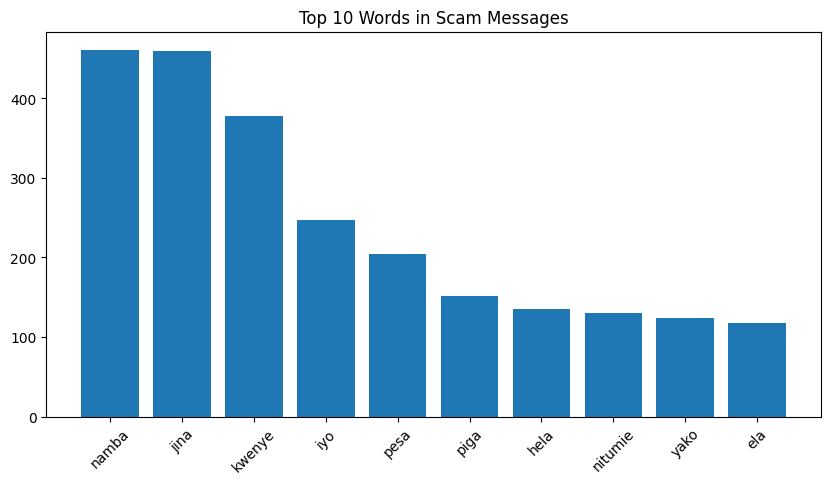

In [ ]:
#1.3 Generate exploratory visualizations

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Word cloud for scam messages
scam_text = ' '.join(data[data['Category'] == 'scam']['cleaned_sms'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(scam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Scam Messages')
plt.savefig('../reports/visualizations/scam_wordcloud.png')
plt.show()

# Top words in scam vs trust
scam_words = scam_text.split()
trust_text = ' '.join(data[data['Category'] == 'trust']['cleaned_sms'])
trust_words = trust_text.split()

scam_freq = Counter(scam_words).most_common(10)
trust_freq = Counter(trust_words).most_common(10)


words, counts = zip(*scam_freq)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Words in Scam Messages')
plt.xticks(rotation=45)
plt.savefig('../reports/visualizations/scam_top_words.png')
plt.show()

In [9]:
#1.4 Identify three unique linguistic patterns in scam messages

from collections import Counter
from nltk import ngrams

# Separate scam and trust messages
scam_texts = data[data['Category'] == 'scam']['cleaned_sms'].tolist()
trust_texts = data[data['Category'] == 'trust']['cleaned_sms'].tolist()

def get_top_ngrams(texts, n=1, top_k=10):
    all_ngrams = []
    for text in texts:
        tokens = text.split()
        all_ngrams.extend(ngrams(tokens, n))
    return Counter(all_ngrams).most_common(top_k)

# unigrams
scam_words = get_top_ngrams(scam_texts, n=1, top_k=10)
print("Top 10 words in scam messages:")
for word, count in scam_words:
    print(f"{word[0]}: {count}")

# bigrams
scam_bigrams = get_top_ngrams(scam_texts, n=2, top_k=10)
print("\nTop 10 bigrams in scam messages:")
for bigram, count in scam_bigrams:
    print(f"{' '.join(bigram)}: {count}")

trust_words = get_top_ngrams(trust_texts, n=1, top_k=10)
print("\nTop 10 words in trust messages:")
for word, count in trust_words:
    print(f"{word[0]}: {count}")


print("\nSample scam messages (raw):")
print(data[data['Category'] == 'scam']['Sms'].head(5))

Top 10 words in scam messages:
namba: 461
jina: 460
kwenye: 378
iyo: 247
pesa: 204
piga: 152
hela: 135
nitumie: 130
yako: 124
ela: 117

Top 10 bigrams in scam messages:
kwenye namba: 128
namba jina: 115
nitumie kwenye: 105
jina litakuja: 95
iyo hela: 83
iyo ela: 83
humu kwenye: 81
jina lije: 81
tiba asili: 79
a day: 68

Top 10 words in trust messages:
wa: 78
tafadhali: 49
kuhusu: 45
kwenye: 37
leo: 36
kazi: 35
kesho: 35
wako: 35
kuna: 32
jana: 31

Sample scam messages (raw):
1    Naomba unitumie iyo Hela kwenye namba hii ya A...
2    666,KARIBU FREEMASON UTIMIZE NDOTO KATIKA BIAS...
4    IYO PESA ITUME KWENYE NAMBA HII 0657538690 JIN...
5    Iyo pesa itume humu kwenye AIRTEL 0696530433 j...
7    Xorry nipo xafari nina xhida kwel nakuomba uni...
Name: Sms, dtype: object


# 3 unique themes gotten from the output above

##### Linguistic Patterns in Scam Messages
1. **Imperative Requests for Money Transfer**  
   - Frequent use of commands like "nitumie" (send me, 130) and "piga" (call, 152) with money terms "pesa" (204) and "hela" (135).  
   - Example: "Naomba unitumie iyo Hela kwenye namba hii" (Please send me that cash to this number).

2. **Instructions Involving Phone Numbers**  
   - High frequency of "namba" (number, 461) and "kwenye" (to/on, 378), often as "kwenye namba" (to the number, 128).  
   - Example: "IYO PESA ITUME KWENYE NAMBA HII 0657538690" (That money send to this number).

3. **Bait with Vague Promises or Formats**  
   - Use of "jina" (name, 460) in phrases like "jina litakuja" (name will come, 95) or lures like "tiba asili" (natural cure, 79).  
   - Example: "666,KARIBU FREEMASON UTIMIZE NDOTO" (Join Freemason to fulfill dreams).